# Import Libraries

In [1]:
import numpy as np
import pandas as pd

from jcopml.automl import AutoRegressor

# Importing Dataset

In [2]:
df = pd.read_csv("Admission_Predict.csv", index_col= 'Serial No.')

df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df = df.rename(columns={'Chance of Admit ': 'Chance_of_Admit', 'GRE Score':'GRE_score', 'University Rating':'University_Rating','TOEFL Score':'TOEFL_Score'})

df.head()

,GRE_score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE_score          400 non-null    int64  
 1   TOEFL_Score        400 non-null    int64  
 2   University_Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance_of_Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 28.1 KB


# Dataset Splitting

In [5]:
X = df.drop(columns="Chance_of_Admit")
y = df.Chance_of_Admit

# Modeling

In [6]:
model = AutoRegressor(num_feature= ['GRE_score','TOEFL_Score','SOP','LOR ','CGPA'],
                      cat_feature= ['University_Rating','Research'])

In [7]:
model.fit(X, y, cv = 5)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
================== Best Model Info ==================
algo                      | ElasticNet
algo__alpha               | 0.011760546087079384
algo__fit_intercept       | True
algo__l1_ratio            | 0.23956189066697248

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=False, strategy='most_frequent')
categorical_encoder       | OneHotEncoder
numerical_imputer         | SimpleImputer(add_indicator=False, strategy='median')
numerical_transformer     | PowerTransformer(method='yeo-johnson')

=========== Score ===========
Train: 0.792704246816983
Valid: 0.7809780528845145
Test : 0.813976311537852


# View Results

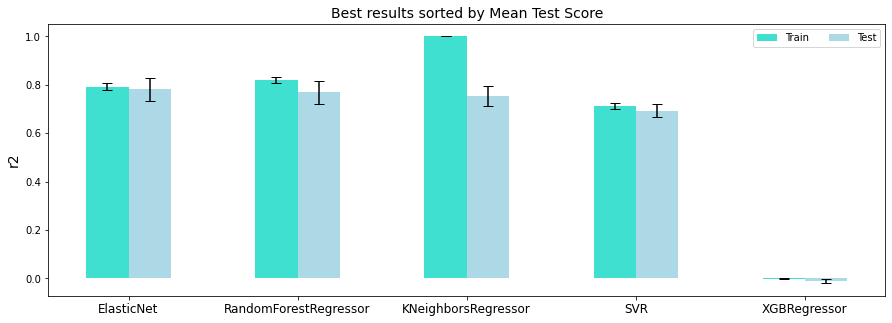

In [8]:
model.plot_results()

# Feature Importance

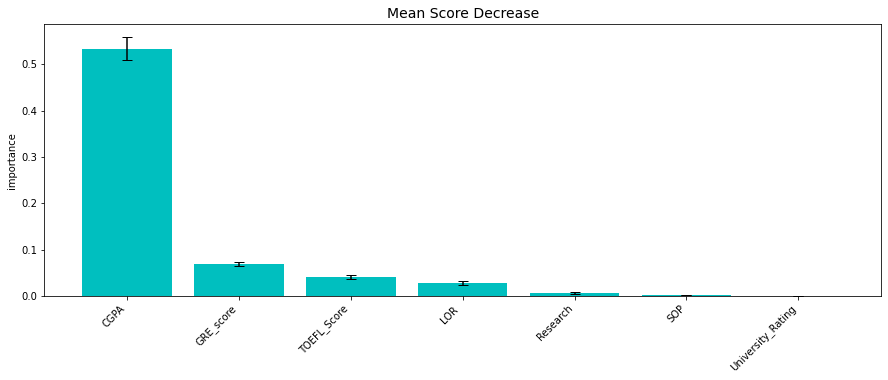

In [9]:
model.mean_score_decrease()

`Because the dataset only have a few columns, I keep taking all the columns`

# Polynomial Feature

In [10]:
model.fit(X, y, cv = 5, algo= ['enet'], poly= True, n_trial = 100)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
================== Best Model Info ==================
algo                      | ElasticNet
algo__alpha               | 0.0032000971577454953
algo__fit_intercept       | False
algo__l1_ratio            | 0.9626484146779253

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=True, strategy='most_frequent')
categorical_encoder       | OneHotEncoder
numerical_imputer         | KNNImputer(add_indicator=False, n_neighbors=5)
numerical_poly            | PolynomialFeatures
numerical_transformer     | PowerTransformer(method='yeo-johnson')

=========== Score ===========
Train: 0.7933682697682077
Valid: 0.7820922633802676
Test : 0.8186932694313565


C:\Anaconda\lib\site-packages\sklearn\preprocessing\_data.py:3234: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


# Evaluation

In [11]:
from jcopml.plot import plot_residual

In [12]:
X_train = model.X_train
y_train = model.y_train
X_test = model.X_test
y_test = model.y_test

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


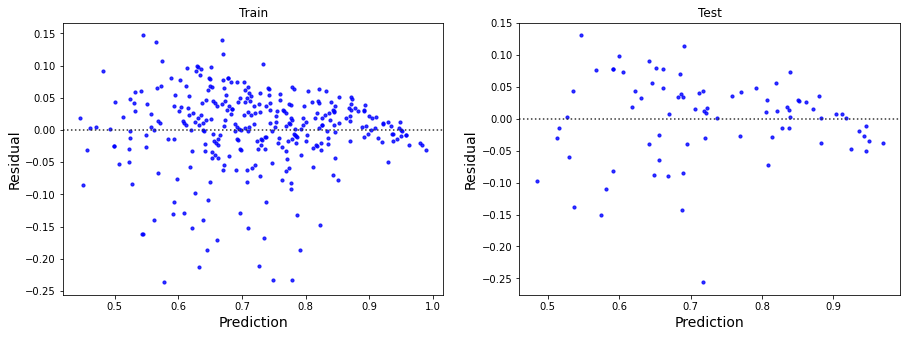

In [13]:
plot_residual(X_train, y_train, X_test, y_test, model.model)

## Error Checking

In [14]:
df_analysis1 = X_test.copy()
df_analysis1['pred']  = model.predict(X_test)
df_analysis1['actual'] = y_test
df_analysis1['error'] = np.abs(df_analysis1.pred - df_analysis1.actual)
df_analysis1.sort_values('error', ascending=False).head(10)

,GRE_score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,pred,actual,error
Serial No.,,,,,,,,,,
10,323,108,3,3.5,3.0,8.60,0,0.717285,0.45,0.267285
375,315,105,2,2.0,2.5,7.65,0,0.573883,0.39,0.183883
95,303,99,3,2.0,2.5,7.66,0,0.536455,0.36,0.176455
43,313,107,2,2.5,2.0,8.50,1,0.688371,0.53,0.158371
377,297,96,2,2.5,2.0,7.43,0,0.484507,0.34,0.144507
94,301,97,2,3.0,3.0,7.88,1,0.581235,0.44,0.141235
40,307,108,2,4.0,3.5,7.70,0,0.591682,0.48,0.111682
16,314,105,3,3.5,2.5,8.30,0,0.649229,0.54,0.109229
117,299,102,3,4.0,3.5,8.62,0,0.668379,0.56,0.108379


# Save Model

In [15]:
model.save(fname= 'Graduate_Admission_Baseline.pkl')

Model is pickled as model/Graduate_Admission_Baseline.pkl
